In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab01.ipynb")

In [2]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

# Lab 1: Using Pandas

*This lab is heavily inspired by [Data 198 Module 2](https://github.com/ds-modules/DATA-198-SP21/blob/main/module_2/module2.ipynb) and [Data 88E Lab 9](https://github.com/data-88e/fa22-dev/blob/main/lab/lab09/lab09.ipynb).*

The `pandas` module is a powerful library for manipulating and analyzing data. In this lab, you will use what you learned in lecture, as well as the `pandas` documentation, to manipulate and analyze some example datasets.

### Learning Objectives

By the end of this lab, you should be able to work with datasets with basic Pandas methods, including
- Read a `.csv` file into a `pandas` dataframe
- Select certain columns from a dataframe
- Filter a dataframe
- Use the `pandas` documentation to complete a certain data manipulation task (e.g. a join)

----

## Price Data over Time

We begin by importing an example dataset that tells us the price of some good over time.

**Question 1.1:** Import the data from the `prices.csv` file into a DataFrame named `prices_raw`.

In [13]:
!ls

lab01_2024_01_24T05_55_54_557271.zip  lab01.ipynb  prices.csv
lab01-Copy1.ipynb		      lab01.pdf


In [14]:
prices_raw = pd.read_csv('prices.csv')
prices_raw

,year,month,price
0,2003.0,1.0,100.52
1,2003.0,2.0,100.71
2,2003.0,3.0,100.95
3,2003.0,4.0,101.29
4,2003.0,5.0,101.38
...,...,...,...
103,2011.0,8.0,119.96
104,2011.0,9.0,120.06
105,2011.0,10.0,120.27
106,2011.0,11.0,120.39


In [15]:
grader.check("q1_1")

q1_1 results: All test cases passed!

First, we want to add a `date` row to this table that contains the date of each entry as a [Python date object](https://docs.python.org/3/library/datetime.html#datetime.date). Using Python date objects allows us to manipulate dates and times conveniently (for example, they make sorting by dates very easy). Below, we've defined a function that, given a row, tells us the date of that row based on its `year` and `month`:

In [10]:
def date_of_row(row):
    return date(int(row['year']), int(row['month']), 1)

As an example, let's see what this function returns when applied to the first row:

In [7]:
date_of_row(prices_raw.iloc[0])

datetime.date(2003, 1, 1)

This looks like what we're looking for. So, how do we apply it to every row in the table? 

Let's look into the `apply` function. Read the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html).

<!-- BEGIN QUESTION -->

**Question 1.2:** What is the `func` argument in the documentation? What should we pass for the `func` argument in this case?

The func argument is short form for "function" which specifies what kind of function to do to the proceeding argument. In the document, the func argument changes around in the different examples, but some include: 'np.sqrt' and 'np.sum'. In our case, we should date_of_row as the function. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.3:** What is the `axis` argument? What should we pass for the `axis` argument in this case?

The axis argument tells which part of the dataframe the function applies to: column (0 or 'index') or row (1 or 'columns'). In this case if we are trying to apply the function to every row in the table, then the axis is 1. 

<!-- END QUESTION -->

**Question 1.4:** Now, construct a `date_column` using the `apply` function. 

In [8]:
date_column = prices_raw.apply((date_of_row),1)
date_column

0      2003-01-01
1      2003-02-01
2      2003-03-01
3      2003-04-01
4      2003-05-01
          ...    
103    2011-08-01
104    2011-09-01
105    2011-10-01
106    2011-11-01
107    2011-12-01
Length: 108, dtype: object

In [9]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5:** Now we want to add the dates as a new column to `prices_raw`. Construct `prices_raw_with_date`, a dataframe containing all of the columns of `prices_raw`, as well as a `date` column with the values from `date_column`.

In [10]:
prices_raw_with_date = prices_raw.copy()  # make a copy of prices_raw

prices_raw_with_date['date']= date_column
prices_raw_with_date

,year,month,price,date
0,2003.0,1.0,100.52,2003-01-01
1,2003.0,2.0,100.71,2003-02-01
2,2003.0,3.0,100.95,2003-03-01
3,2003.0,4.0,101.29,2003-04-01
4,2003.0,5.0,101.38,2003-05-01
...,...,...,...,...
103,2011.0,8.0,119.96,2011-08-01
104,2011.0,9.0,120.06,2011-09-01
105,2011.0,10.0,120.27,2011-10-01
106,2011.0,11.0,120.39,2011-11-01


In [11]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6:** Create a new table, `prices`, that contains only the `date` and `price` columns from the `prices_raw_with_date` table.

In [12]:
prices = prices_raw_with_date[['date','price']].copy()
prices

,date,price
0,2003-01-01,100.52
1,2003-02-01,100.71
2,2003-03-01,100.95
3,2003-04-01,101.29
4,2003-05-01,101.38
...,...,...
103,2011-08-01,119.96
104,2011-09-01,120.06
105,2011-10-01,120.27
106,2011-11-01,120.39


In [13]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7:** Now, we can filter the dataframe like we did in lecture. For example, we could get all rows where the price is between 105 and 115, exclusive. Put all of these rows in a new dataframe, `filtered_prices`.

In [14]:
filtered_prices = prices[(prices['price']>105) & (prices['price']<115)]
filtered_prices.head()

,date,price
19,2004-08-01,105.04
20,2004-09-01,105.20
21,2004-10-01,105.63
22,2004-11-01,105.81
23,2004-12-01,105.93


In [15]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8:** How many rows and columns are in `filtered_prices_subset`? Assign `dims` to a tuple containing the dimensions of `filtered_prices_subset`.

In [16]:
dims = filtered_prices.shape
dims



(43, 2)

In [17]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 1.9:** Make a new dataframe that contains just the first 5 rows of `filtered_prices` and assign it to `filtered_prices_subset`. 

Hint: Should you use `.loc` or `.iloc` here?

In [18]:
filtered_prices_subset = filtered_prices.iloc[:5].copy()
filtered_prices_subset

,date,price
19,2004-08-01,105.04
20,2004-09-01,105.20
21,2004-10-01,105.63
22,2004-11-01,105.81
23,2004-12-01,105.93


In [19]:
grader.check("q1_9")

q1_9 results: All test cases passed!

Now, let's visualize how the price changes over time. We're using [Matplotlib](https://matplotlib.org/) to produce this plot; you will learn more about this later in the course. 

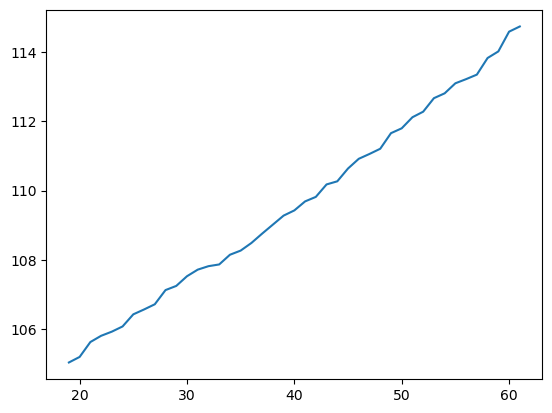

In [20]:
plt.plot(filtered_prices['price']);

**Question 1.10:** The x-axis doesn't tell us much here. By reindexing the dataframe to the `date` column, we can make the x-axis more clear. Set the index of `filtered_prices` to be the `date` column and then replot the graph.

P.S. We are only able to get a meaningful x-axis because the `date` column only contains Python datetime objects!

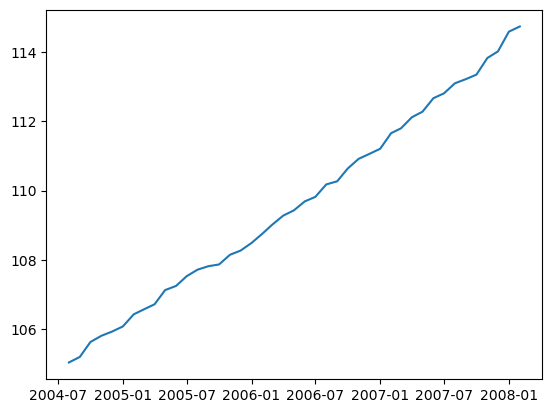

In [21]:
reindexed_filtered_prices = filtered_prices.set_index('date')
plt.plot(reindexed_filtered_prices['price']); # This line replots the graph



In [22]:
grader.check("q1_10")

q1_10 results: All test cases passed!

While looking at raw prices can be helpful, it is often more informative to adjust for inflation and consider the real price of the good over time. Let's say (hypothetically of course) you know that for each month in `reindexed_filtered_prices`, inflation grew by roughly 0.1%. 

**Question 1.11:** Create a dataframe `real_cost` which has the date as the index and 3 columns. The `price` column should be the same as in `reindexed_filtered_prices`, `inflation` should represent the [GDP deflator](https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/economic-iondicators-and-the-business-cycle/real-vs-nominal-gdp/v/gdp-deflator) (with the deflator for the first month being 100, the deflator for the second month being 100.1, etc.), and `real price` should be the inflation-adjusted price. You can see what the first 5 rows of the resulting DataFrame should look like by running the cell below.

*Hint:* Consider using a list comprehension combined with a NumPy method for the `inflation` column.


In [23]:
first_5_rows = {
    'date': ['2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01', '2004-12-01'],
    'price': [105.04, 105.20, 105.63, 105.81, 105.93],
    'inflation': [100.0000, 100.1000, 100.2001, 100.3003, 100.4006],
    'real price': [1.050400, 1.050949, 1.054191, 1.054932, 1.055073]
}

pd.DataFrame(first_5_rows).set_index('date')

,price,inflation,real price
date,,,
2004-08-01,105.04,100.0000,1.050400
2004-09-01,105.20,100.1000,1.050949
2004-10-01,105.63,100.2001,1.054191
2004-11-01,105.81,100.3003,1.054932
2004-12-01,105.93,100.4006,1.055073


In [24]:
real_cost = pd.DataFrame()
real_cost['price'] = reindexed_filtered_prices['price'] #column in the new df for price
    
#column in the new df for inflation 
inflation = [(100 * (1.001**x)) for x in np.arange(0, 43)]
real_cost['inflation'] = inflation

#column for real price
#real_price = price/inflation
real_cost['real price'] = real_cost['price']/real_cost['inflation']

real_cost


,price,inflation,real price
date,,,
2004-08-01,105.04,100.000000,1.050400
2004-09-01,105.20,100.100000,1.050949
2004-10-01,105.63,100.200100,1.054191
2004-11-01,105.81,100.300300,1.054932
2004-12-01,105.93,100.400600,1.055073
2005-01-01,106.08,100.501001,1.055512
2005-02-01,106.43,100.601502,1.057936
2005-03-01,106.57,100.702104,1.058270
2005-04-01,106.72,100.802806,1.058701


In [25]:
grader.check("q1_11")

q1_11 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.12:** How do the real cost and nominal cost change over time?

Real cost, as opposed to nominal cost, is adjusted for inflation. Thus, over time, real cost moves slower than nominal cost change over time. Both nominal and real costs are increasing over time. 

<!-- END QUESTION -->

Let us now plot the real cost over time.

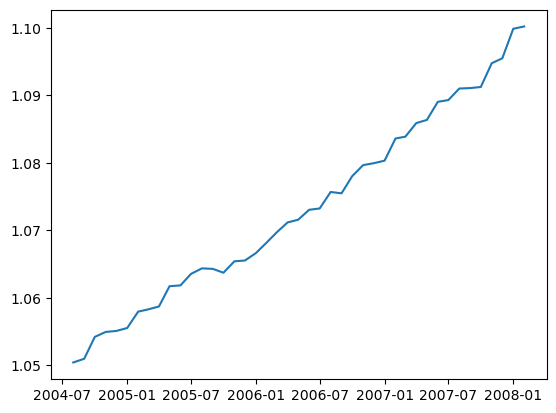

In [26]:
plt.plot(real_cost['real price']);

Going back to the dataframe `prices`, which dates had the most expensive prices? I would say 2008 had the most expensive prices because of inflation.

**Question 1.13:** Sort the dataframe `prices` by the `price` column, in descending order. Notice how we expect you to sort the dataframe itself, not assign the sorted dataframe to a new variable. You should be able to do this in one line of code.

In [27]:
#df_prices_sorted = prices.sort_values(by = 'price' , ascending = False)

prices.sort_values(by='price', ascending=False, inplace = True)

#print(prices)


In [28]:
grader.check("q1_13")

q1_13 results: All test cases passed!

**Question 1.14:** Just for fun, let us rename the columns of `prices` to have correct capitalization. `date` should become `Date` and `price` should become `Price`.

In [29]:
prices.rename(columns={'date':'Date','price':'Price'},inplace=True)

In [30]:
grader.check("q1_14")

q1_14 results: All test cases passed!

## Feedback

**Question 2:** Please fill out this short [feedback form](https://forms.gle/ymNkBHY5PcCq2YA79) to let us know your thoughts on this lab! We really appreciate your opinions and feedbacks! At the end of the Google form, you should see a codeword. Assign the codeword to the variable `codeword_feedback` below. 

In [31]:
codeword_feedback = "filter"

In [32]:
grader.check("q2")

q2 results: All test cases passed!

## Pre-Semester Survey

**Question 3:** Please fill out the [pre-semester survey](https://forms.gle/MoqPzyCj1Xj2qQvJ7) to help us get to know you better! Similar to the feedback, at the end of the Google form, you should see a codeword. Assign the codeword to the variable `codeword_survey` below. 

**Note:** This question is worth 3 points, we strongly recommend you do not skip it.

In [33]:
codeword_survey = "excited"

In [34]:
grader.check("q3")

q3 results: All test cases passed!

**Congratulations**, you are finished with lab 1 of econ 148!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [35]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_4 results: All test cases passed!

    q1_5 results: All test cases passed!

    q1_6 results: All test cases passed!

    q1_7 results: All test cases passed!

    q1_8 results: All test cases passed!

    q1_9 results: All test cases passed!

    q1_10 results: All test cases passed!

    q1_11 results: All test cases passed!

    q1_13 results: All test cases passed!

    q1_14 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!
